## Exercise 7

## Part 1 - Capital Bikeshare data


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import plot_tree


In [2]:
bikes = pd.read_csv('./bikeshare.csv', index_col='datetime', parse_dates=True)

In [3]:
bikes.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
bikes.rename(columns={'count':'total'}, inplace=True)

In [5]:
bikes['hour'] = bikes.index.hour

In [6]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [7]:
bikes.tail()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,23


In [8]:
bikes.shape

(10886, 12)

In [9]:
bikes.head(25)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,5
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,6
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,7
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,8


## Exercise 7.1

In [10]:
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

In [11]:
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

**¿Qué dicen sobre los datos?**

Con la primera agrupación podemos observar que hay en promedio un mayor número de bicicletas rentadas durante la semana. No obstante, el número de bicicletas rentadas en promedio los fines de semana tienen un comportamiento muy similar. 
Con la segunda agrupación podemos evidenciar el número promedio de bicletas rentadas en las diferentes franjas horarias del día. Se observa un número menor de bicletas rentadas al comienzo del día, cerca de las 7 de la mañana aumenta considerablemente,quizas por ser una hora de alto tráfico, luego disminuye un poco y cerca de las 6 de la tarde vuelve a tomar un aunmento y finalmente disminuye. 

## Exercise 7.2

### Gráficas

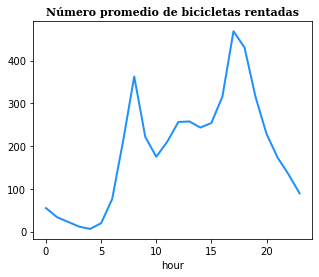

In [12]:
bikes.groupby('hour').total.mean().plot(figsize=(5,4), linewidth=2, fontsize=10,color="dodgerblue")
plt.title("Número promedio de bicicletas rentadas", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 11})
plt.show()

In [13]:
bikes_weekend = bikes[bikes['workingday'] == 0]

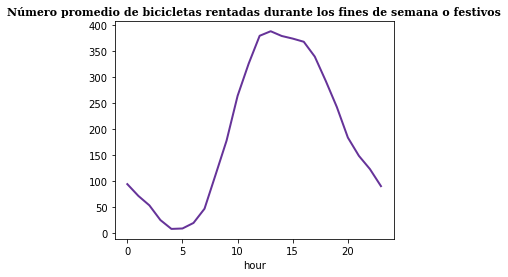

In [14]:
bikes[bikes['workingday'] == 0].groupby('hour').total.mean().plot(figsize=(5,4), linewidth=2, fontsize=10,color="rebeccapurple")
plt.title("Número promedio de bicicletas rentadas durante los fines de semana o festivos", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 11})
plt.show()

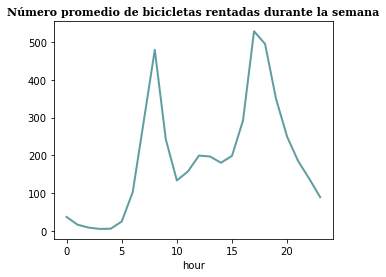

In [15]:
bikes[bikes['workingday'] == 1].groupby('hour').total.mean().plot(figsize=(5,4), linewidth=2, fontsize=10,color="cadetblue")
plt.title("Número promedio de bicicletas rentadas durante la semana", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 11})
plt.show()

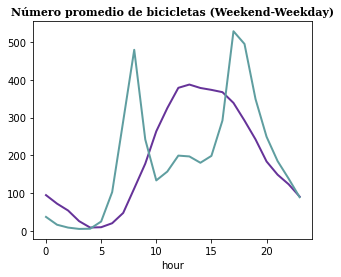

In [16]:
bikes[bikes['workingday'] == 0].groupby('hour').total.mean().plot(figsize=(5,4), linewidth=2, fontsize=10,color="rebeccapurple",label='c')
bikes[bikes['workingday'] == 1].groupby('hour').total.mean().plot(figsize=(5,4), linewidth=2, fontsize=10,color="cadetblue")
plt.title("Número promedio de bicicletas (Weekend-Weekday)", 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 11})
plt.show()


Se puede observar un comportamiendo diferente según el tipo de día de la semana, el gráfico muestra que en algunas horas el comportamiento es contrario. En promedio se alcanza un mayor número de bicicletas alquiladas durante la semana.

### Models

## Exercise 7.3

#### Regresión Lineal

In [17]:
x=bikes.iloc[:, [2,11]]
y=bikes['total']

In [18]:
x.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   workingday  10886 non-null  int64
 1   hour        10886 non-null  int64
dtypes: int64(2)
memory usage: 255.1 KB


In [19]:
y.shape

(10886,)

In [20]:
import statsmodels.api as sm
from scipy import stats
X=sm.add_constant(x)
fit0 = sm.OLS(y, X)
fit0 = fit0.fit()
print(fit0.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     1041.
Date:                Tue, 20 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:13:50   Log-Likelihood:                -71093.
No. Observations:               10886   AIC:                         1.422e+05
Df Residuals:                   10883   BIC:                         1.422e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.7060      3.866     17.514      0.0

In [21]:
# Modelo
# ===============================================================================
fit1 = linear_model.LinearRegression()
fit1.fit( x, y )

LinearRegression()

In [22]:
# Información del modelo
# ==============================================================================
rmse = mean_squared_error(y_true  = y,y_pred  = fit1.predict(X = x),squared = False)

print("Intercept:", fit1.intercept_)
print( "Coeficientes:", fit1.coef_ )
print("Coeficiente de determinación R^2:", fit1.score(x, y))
print(f"El error (rmse) del modelo es: {rmse}")


Intercept: 67.70595026191623
Coeficientes: [ 4.07248627 10.49206282]
Coeficiente de determinación R^2: 0.16059115011434866
El error (rmse) del modelo es: 165.95558216733295


De acuerdo con los resultados obtenidos, manteniendo constantes los demás parámetros, por cada hora adicional en la franja horaria que se tiene para el alquiler de bicicletas se espera que en promedio aumente 10.49 el número total de bicicletas alquilidas, por otra parte si el alquiler se realiza durante la semana (Workingday==1) se puede esperar que el número total de bicicletas alquiladas aumente en promedio 4.07 veces.

Adicionalmente, podemos observar que es un modelo débil, ya que solo explica el 16.05% de la variabilidad de los datos y se justifica, ya que, como se observó anteriormente en las gráficas la relación entre la variable 'total' y 'hour' no tiene un comportamiento lineal. Probablemente modelos más flexibles permitan capturar de mejor manera la variabilidad de las variables predictoras respecto a la variable objetivo.


## Exercice 7.4

#### Árbol de decisión manualmente

In [23]:
def rss(y_left, y_right):
    def squared_residual_sum(y):
        return np.sum((y - np.mean(y)) ** 2)
    
    return squared_residual_sum(y_left) + squared_residual_sum(y_right)

In [24]:
def compute_rss_by_threshold(feature):
    features_rss = []
    thresholds = X_train[feature].unique().tolist()
    thresholds.sort()
    thresholds = thresholds[1:]
    for t in thresholds:
        y_left_ix = X_train[feature] < t
        y_left, y_right = y_train[y_left_ix], y_train[~y_left_ix]
        features_rss.append(rss(y_left, y_right))
    return thresholds, features_rss

In [25]:
def find_best_rule(X_train, y_train):
    best_feature, best_threshold, min_rss = None, None, np.inf
    for feature in X_train.columns:
        thresholds = X_train[feature].unique().tolist()
        thresholds.sort()
        thresholds = thresholds[1:]
        for t in thresholds:
            y_left_ix = X_train[feature] < t
            y_left, y_right = y_train[y_left_ix], y_train[~y_left_ix]
            t_rss = rss(y_left, y_right)
            if t_rss < min_rss:
                min_rss = t_rss
                best_threshold = t
                best_feature = feature
    
    return {'feature': best_feature, 'threshold': best_threshold}

In [26]:
def split(X_train, y_train, depth, max_depth):
    if depth == max_depth or len(X_train) < 2:
        return {'prediction': np.mean(y_train)}
    
    rule = find_best_rule(X_train, y_train)
    left_ix = X_train[rule['feature']] < rule['threshold']
    rule['left'] = split(X_train[left_ix], y_train[left_ix], depth + 1, max_depth)
    rule['right'] = split(X_train[~left_ix], y_train[~left_ix], depth + 1, max_depth)
    return rule

rules = split(x,y,3,6)

In [27]:
rules

{'feature': 'hour',
 'threshold': 7,
 'left': {'feature': 'hour',
  'threshold': 6,
  'left': {'feature': 'hour',
   'threshold': 2,
   'left': {'prediction': 44.51045104510451},
   'right': {'prediction': 15.27718309859155}},
  'right': {'feature': 'workingday',
   'threshold': 1,
   'left': {'prediction': 19.99310344827586},
   'right': {'prediction': 102.57741935483871}}},
 'right': {'feature': 'hour',
  'threshold': 21,
  'left': {'feature': 'hour',
   'threshold': 16,
   'left': {'prediction': 243.9499878019029},
   'right': {'prediction': 351.95877192982454}},
  'right': {'feature': 'hour',
   'threshold': 23,
   'left': {'prediction': 153.47368421052633},
   'right': {'prediction': 89.50877192982456}}}}

In [28]:
def predict(sample, rules):
    prediction = None
    while prediction is None:
        feature, threshold = rules['feature'], rules['threshold']
        if sample[feature] < threshold:
            rules = rules['left']
        else:
            rules = rules['right']
        prediction = rules.get('prediction', None)
    return prediction

In [29]:
def evaluate(X, y):
    preds = X.apply(predict, axis='columns', rules=rules.copy())
    return r2_score(preds, y)

In [30]:
rmse= mean_squared_error(y_true  = y ,y_pred  = x.apply(predict, axis='columns', rules=rules.copy()),squared = False)
print('rmse :', rmse)

rmse : 135.42666961094804


## Exercice 7.5

#### Árbol de decisión usando sklearn

In [31]:
x_train, x_test, y_train, y_test = train_test_split(
                                     x, y, test_size=0.30, random_state=42)

In [32]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7620 entries, 2011-02-08 17:00:00 to 2012-05-02 07:00:00
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   workingday  7620 non-null   int64
 1   hour        7620 non-null   int64
dtypes: int64(2)
memory usage: 178.6 KB


In [33]:
y_train

datetime
2011-02-08 17:00:00    176
2011-09-18 23:00:00     54
2011-08-19 04:00:00      8
2012-11-06 06:00:00    149
2011-04-05 11:00:00     19
                      ... 
2012-01-14 02:00:00     38
2011-12-10 09:00:00    149
2011-12-18 16:00:00    234
2011-02-19 07:00:00     22
2012-05-02 07:00:00    358
Name: total, Length: 7620, dtype: int64

In [34]:
# Calibración párametro de profundidad
# ----------------------------------------
myList = list(range(1,10))
scores =[]
for i in myList:
  dt_reg = DecisionTreeRegressor(max_depth=i)
  dt_reg.fit(x_train,y_train)
  scores.append(dt_reg.score(x_train, y_train))
print(myList[scores.index(max(scores))])

9


Al ajustar varios modelos con distintos opciones en el párametro de profundidad (Rango (1-10)) se obtiene que el modelo con mejor desempeño es el ajustado con max_deph=9, ya que es el que presenta un mayor R2, como se observa en la siguiente gráfica:

Text(0, 0.5, 'R2 Score')

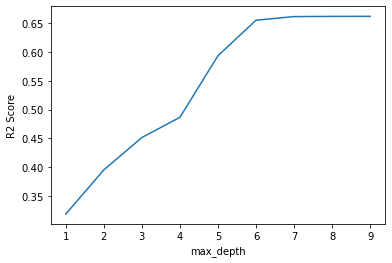

In [35]:
plt.plot(myList, scores)
plt.xlabel('max_depth')
plt.ylabel('R2 Score')

In [36]:
# Creación del modelo
# ------------------------------------------------------------------------------
fit2 = DecisionTreeRegressor(
            max_depth         = 9,
            random_state      = 42)

In [37]:
fit2.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=9, random_state=42)

In [38]:
# Evaluación del modelo
# ------------------------------------------------------------------------------
predicciones_test = fit2.predict(X = x_test)
predicciones_train = fit2.predict(X = x)

rmse_test= mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones_test,
        squared = False
       )
rmse_train = mean_squared_error(
        y_true  = y,
        y_pred  = predicciones_train,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse_test}")
print(f"El error (rmse) de train es: {rmse_train}")
print("Coeficiente de determinación R^2 test:", fit2.score(x_train, y_train))
print("Coeficiente de determinación R^2 train:", fit2.score(x, y))

El error (rmse) de test es: 109.03424028181973
El error (rmse) de train es: 106.52192410971273
Coeficiente de determinación R^2 test: 0.6624294624612472
Coeficiente de determinación R^2 train: 0.6541658960383305


Finalmente, podemos observar que el modelo ajustado por medio de la función *DecisionTreeRegressor* presenta un mejor desempeño frente al modelo ajustado por la regresión lineal. En este caso se obtiene un rmse menor y R2 del **66,24%**

### Part 2 - Bagging

### Mashable news stories analysis

In [39]:
df = pd.read_csv('mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [40]:
df.shape

(6000, 61)

In [41]:
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']

In [42]:
y.mean()

0.5

In [43]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
train=X_train.assign(Popular=y_train)
train.shape

(4500, 60)

### Exercise 7.6
Estimate a Decision Tree Classifier and a Logistic Regression

Evaluate using the following metrics:

   - Accuracy
<img src="accuracy.png" alt="Formula precisión" title="Title text" />
   - F1-Score

<img src="f1_score.svg" alt="Formula" title="Title text" />

### Árbol de Decisión y sus 2 metricas de desempeño

In [44]:
DT=DecisionTreeClassifier(max_features="sqrt", max_depth=None, random_state=1)
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.5748987854251012, 0.58)

### Regresión Logística y sus 2 metricas de desempeño

In [45]:
logreg = LogisticRegression(solver='newton-cg')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)


D:\Program_Files\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


(0.639446366782007, 0.6526666666666666)

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[517 227]
 [294 462]]


La matriz nos indica que tenemos 517+462 predicciones correctas y 294+227 predicciones incorrectas. Las metricas comparables muestran que la regresión logística da una mejor precisión y mejor F1 Score.

### Exercise 7.7
Estimate 300 bagged samples

Estimate the following set of classifiers:

100 Decision Trees where max_depth=None

100 Decision Trees where max_depth=2

100 Logistic Regressions

In [47]:
#Crear los indices para seleccionar la muestra de los 300 modelos
samples = [np.random.choice(a=train.shape[0], size=train.shape[0], replace=True) for _ in range(1,301)]

In [48]:
#Datos de muestra del primer modelo DT
train.iloc[samples[1], :]

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
1518,702.0,12.0,2817.0,0.381759,1.0,0.589351,45.0,6.0,12.0,1.0,...,0.033333,1.00,-0.255190,-0.6,-0.050000,0.717857,0.442857,0.217857,0.442857,1
4990,491.0,10.0,445.0,0.565820,1.0,0.677305,5.0,3.0,1.0,0.0,...,0.033333,0.80,-0.245988,-0.7,-0.100000,0.000000,0.000000,0.500000,0.000000,1
1959,225.0,9.0,173.0,0.623529,1.0,0.649123,2.0,1.0,10.0,0.0,...,0.100000,0.60,-0.367460,-1.0,-0.155556,0.000000,0.000000,0.500000,0.000000,1
355,239.0,8.0,365.0,0.565934,1.0,0.665354,3.0,3.0,10.0,0.0,...,0.033333,0.80,-0.305556,-0.5,-0.125000,0.000000,0.000000,0.500000,0.000000,0
3236,724.0,14.0,207.0,0.668317,1.0,0.778626,4.0,1.0,0.0,0.0,...,0.400000,0.90,-0.305952,-0.6,-0.050000,0.500000,0.500000,0.000000,0.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,258.0,10.0,1241.0,0.395480,1.0,0.567227,1.0,1.0,3.0,0.0,...,0.050000,1.00,-0.341322,-0.7,-0.050000,0.500000,0.750000,0.000000,0.750000,0
4182,600.0,13.0,175.0,0.710983,1.0,0.867347,3.0,1.0,0.0,0.0,...,0.400000,0.75,0.000000,0.0,0.000000,1.000000,0.000000,0.500000,0.000000,1
3948,491.0,8.0,531.0,0.508806,1.0,0.635821,4.0,4.0,11.0,0.0,...,0.033333,1.00,-0.164583,-0.2,-0.125000,0.642857,0.214286,0.142857,0.214286,1
4679,195.0,5.0,229.0,0.560748,1.0,0.621429,4.0,3.0,12.0,0.0,...,0.033333,0.50,-0.281019,-0.5,-0.155556,0.000000,0.000000,0.500000,0.000000,1


In [49]:
#Crear 100 modelos para cada grupo de clasificadores
n_estimators = 100

np.random.seed(123)
seeds = np.random.randint(1, 10000, size=300)

trees = {}
for i in range(n_estimators):
    trees[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=None, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    
trees1 = {}
for i in range(n_estimators,200):
    trees1[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=2, random_state=seeds[i])
    trees1[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    
trees2 = {}
for i in range(200,300):
    trees2[i] = LogisticRegression(solver='liblinear', random_state=seeds[i])
    trees2[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

In [50]:
# Prediccion
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = trees[i].predict(X_test)
    


y_pred_df1 = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators,200)))
for i in range(n_estimators,200):
    y_pred_df1.loc[:, i] = trees1[i].predict(X_test)



y_pred_df2 = pd.DataFrame(index=X_test.index, columns=list(range(200,300)))
for i in range(200,300):
    y_pred_df2.loc[:, i] = trees2[i].predict(X_test)

y_pred_df1.head()

,100,101,102,103,104,105,106,107,108,109,...,190,191,192,193,194,195,196,197,198,199
1483,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,0,1,1,1,1
2185,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,1,1,1,1
2520,1,0,1,1,1,1,1,1,1,1,...,1,1,0,1,0,0,1,0,1,0
3721,1,0,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
3727,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Exercise 7.8

Ensemble using majority voting

Evaluate using the following metrics:

   - Accuracy
   - F1-Score

In [51]:
y.value_counts().to_frame('count').assign(percentage = lambda x: x/x.sum())

,count,percentage
1,3000,0.5
0,3000,0.5


#### Predicción usando ensamblaje con mayoria de voto de cada tipo de clasificador

In [52]:
y_pred_df.sum(axis=1)
y_pred = (y_pred_df.sum(axis=1) >= (n_estimators / 2))
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6582947785855915, 0.6553333333333333)

In [53]:
y_pred_df1.sum(axis=1)
y_pred = (y_pred_df1.sum(axis=1) >= (n_estimators / 2))
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6374228923920494, 0.6473333333333333)

In [54]:
y_pred_df2.sum(axis=1)
y_pred = (y_pred_df2.sum(axis=1) >= (n_estimators / 2))
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6048442906574394, 0.6193333333333333)

#### Combinación de los 300 modelos con mayoria de voto

In [55]:
y_pred_all=pd.merge(y_pred_df,y_pred_df1,left_index=True, right_index=True)
y_pred_all=pd.merge(y_pred_all,y_pred_df2,left_index=True, right_index=True)
y_pred_all.shape

(1500, 300)

In [56]:
y_pred_all.sum(axis=1)
y_pred = (y_pred_all.sum(axis=1) >= ((n_estimators*3) / 2))
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6219426974143956, 0.6393333333333333)

#### No se logra mejorar el F1-score ni la precisión combinando los 300 modelos de los 3 tipos de clasificadores respecto a las versiones individuales de cada grupo de modelos

#### Comparacion usando Sklearn

In [57]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=None), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.642384105960265, 0.64)

In [58]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6439545758183033, 0.6446666666666667)

In [59]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(LogisticRegression(solver='liblinear'), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.611535788742182, 0.6273333333333333)

Se obtiene resultados similares con la implementación a mano de los modelos de árboles de decisión y regresión logística que los entregados por la librería Sklearn. El mejor F1-Score y Precisión se logró con el DT que no tenía un máximo de profundidad como parámetro.

### Exercise 7.9

Estimate the probability as %models that predict positive

Modify the probability threshold and select the one that maximizes the F1-Scor

In [60]:
positive=(y_pred_all.mean(axis=1))
positive.mean(0)

0.47489111111111176

En promedio el 47.48% de los modelos predice como positiva la popularidad de un artículo.

In [61]:
f1_score={}
for threshold in range(1,9):
    y_pred = (y_pred_all.sum(axis=1) >= ((n_estimators*3) * (threshold/10)))
    f1_score[threshold]=metrics.f1_score(y_pred, y_test)
f1_score=pd.DataFrame(f1_score,index=range(1,9)).iloc[1,:]

Text(0, 0.5, 'F1_Score')

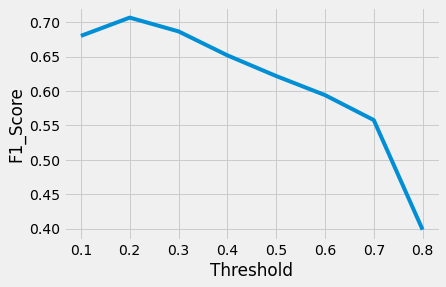

In [62]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.plot(np.arange(0.1,0.9,0.1),f1_score,)
plt.xlabel('Threshold')
plt.ylabel('F1_Score')

Se puede concluir que se maximiza el F1-Score con un threshold del 20%

### Exercise 7.10

Ensemble using weighted voting using the oob_error

Evaluate using the following metrics:

- Accuracy
- F1-Score

In [63]:
samples_oob = []
n_samples = train.shape[0]
# Obtener el Out observation sample
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))

Estimación del out of bag error usando el F1-Score

In [64]:
errors = np.zeros(n_estimators)
errors1 = np.zeros(n_estimators)
errors2 = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_ = trees[i].predict(X_train.iloc[samples_oob[i]])
    y_pred_1 = trees1[i+100].predict(X_train.iloc[samples_oob[i+100]])
    y_pred_2 = trees2[i+200].predict(X_train.iloc[samples_oob[i+200]])   
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)
    errors1[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i+100]], y_pred_1)    
    errors2[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i+200]], y_pred_2) 

errors_all=np.concatenate((errors, errors1, errors2), axis=0)

In [65]:
#Estimación del alpha
alpha = (1 - (errors_all) / (1 - (errors_all)).sum())
errors

array([0.45662949, 0.43599034, 0.43939394, 0.43268054, 0.435882  ,
       0.43494197, 0.45798817, 0.4354154 , 0.46224117, 0.43181818,
       0.44981862, 0.452237  , 0.44410319, 0.44312796, 0.43892216,
       0.44571086, 0.43244911, 0.45653459, 0.417603  , 0.44256348,
       0.4383728 , 0.4374269 , 0.45471236, 0.44222626, 0.45554202,
       0.45525526, 0.428051  , 0.44085366, 0.44123077, 0.42643541,
       0.45051609, 0.43920145, 0.4624105 , 0.43881857, 0.44339063,
       0.43098252, 0.44751381, 0.45961995, 0.44590556, 0.44137508,
       0.46740467, 0.44838119, 0.44130042, 0.41570997, 0.43246445,
       0.45901639, 0.44337349, 0.44652568, 0.43459916, 0.44264264,
       0.43911218, 0.4557945 , 0.4293578 , 0.4681358 , 0.4392638 ,
       0.45678271, 0.43686415, 0.4566787 , 0.46135266, 0.45878788,
       0.45935961, 0.44070905, 0.43452022, 0.45297619, 0.46050214,
       0.44389642, 0.45182927, 0.42883436, 0.42585784, 0.43119266,
       0.4437165 , 0.44026284, 0.47118848, 0.44022072, 0.46140

In [66]:
weighted_sum_ = ((y_pred_all) * alpha).sum(axis=1)

In [67]:
y_pred = (weighted_sum_ >= (n_estimators*3) * 0.5)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6219426974143956, 0.6393333333333333)

### Exercise 7.11

Estimate the probability of the weighted voting

Modify the probability threshold and select the one that maximizes the F1-Score

In [68]:
positive=((y_pred_all* alpha).mean(axis=1))
positive.mean(0)

0.4737818156295732

En promedio el 47.37% de los modelos predice como positiva la popularidad de un artículo usando votación ponderada.

In [69]:
f1_score1={}
for threshold in range(1,9):
    y_pred = (weighted_sum_ >= ((n_estimators*3) * (threshold/10)))
    f1_score1[threshold]=metrics.f1_score(y_pred, y_test)
f1_score1=pd.DataFrame(f1_score1,index=range(1,9)).iloc[1,:]
f1_score1

1    0.682503
2    0.704652
3    0.682606
4    0.652005
5    0.621943
6    0.587361
7    0.548988
8    0.389105
Name: 2, dtype: float64

Text(0, 0.5, 'F1_Score')

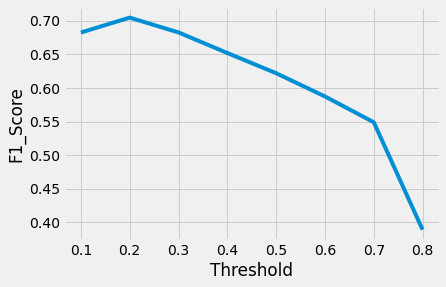

In [70]:
plt.style.use('fivethirtyeight')
plt.plot(np.arange(0.1,0.9,0.1),f1_score1)
plt.xlabel('Threshold')
plt.ylabel('F1_Score')

Se puede concluir que se maximiza el F1-Score con un threshold del 20%

### Exercise 7.12
Estimate a logistic regression using as input the estimated classifiers

Modify the probability threshold such that maximizes the F1-Score

Se contruye output de los 300 modelos para iniciar stacking

In [89]:
X_train_2 = pd.DataFrame(index=X_train.index, columns=list(range(n_estimators*3)))

for i in range(n_estimators):
    X_train_2[i] = trees[i].predict(X_train)
    
for i in range(n_estimators,200):
    X_train_2[i] = trees1[i].predict(X_train)
    
for i in range(200,300):
    X_train_2[i] = trees2[i].predict(X_train)

A continuación se carga el modelo de regresión logística con CV=10

In [90]:
from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV(cv = 10 )
lr.fit(X_train_2, y_train)

LogisticRegressionCV(cv=10)

In [91]:
y_pred = lr.predict(y_pred_all)

In [92]:
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6533066132264529, 0.654)

#### Se puede observar que el stacking con regresion logística logra mejoras respecto al modelo bagging con votación simple y ponderada tanto en su precisión como el F1-score.

A continuación se obtienen las predicción como probabilidades para probarlas con diferentes umbrales y explorar posibles mejores resultados respecto al F1-Score

In [93]:
y_pred = lr.predict_proba(y_pred_all)
y_pred=y_pred[:,1]
y_pred

array([0.7202151 , 0.65904805, 0.59168195, ..., 0.58987701, 0.36290464,
       0.28992383])

In [94]:
f1_score2={}
for threshold in range(1,9):
    y_pred2 = (y_pred >= (threshold/10))
    f1_score2[threshold]=metrics.f1_score(y_pred2, y_test)
f1_score2=pd.DataFrame(f1_score2,index=range(1,9)).iloc[1,:]

Text(0, 0.5, 'F1_Score2')

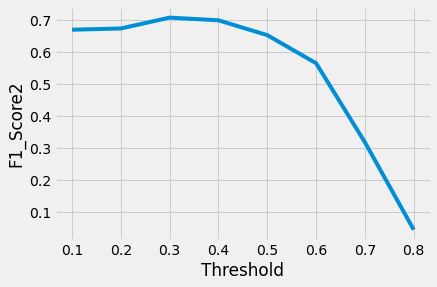

In [95]:
plt.style.use('fivethirtyeight')
plt.plot(np.arange(0.1,0.9,0.1),f1_score2)
plt.xlabel('Threshold')
plt.ylabel('F1_Score2')

Se evidencia que el modelo de stacking con LR logra un mejor desempeño en terminos de F1-Score usando un umbral del 40% logrando un 0.70938, lo anterior representa una mejora significativa respecto a los demas modelos probados.